In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=FutureWarning)

In [11]:
df = pd.read_csv('..\\..\\data\\csv\\FY_2022-2025.csv')

# Clean column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()

print("--- Initial Data Overview ---")
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows:")
df.head()
df.info()


--- Initial Data Overview ---
Shape of the dataset: (9063, 37)

First 5 rows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9063 entries, 0 to 9062
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Hospital CCN                                 9063 non-null   object 
 1   Payment adjustment factor                    9061 non-null   float64
 2   Payment reduction percentage                 9061 non-null   float64
 3   Dual proportion                              9061 non-null   float64
 4   Peer group assignment                        9061 non-null   float64
 5   Neutrality modifier                          9061 non-null   float64
 6   Number of eligible discharges for AMI        8752 non-null   object 
 7   ERR for AMI                                  8752 non-null   object 
 8   Peer group median ERR for AMI                9061 non-null   float64
 


--- Building AMI Penalty Prediction Model ---

Accuracy for AMI model: 0.85

Classification Report for AMI model:
              precision    recall  f1-score   support

  No Penalty       0.83      0.98      0.90      1918
     Penalty       0.91      0.53      0.67       801

    accuracy                           0.85      2719
   macro avg       0.87      0.76      0.79      2719
weighted avg       0.86      0.85      0.83      2719


AMI model evaluation complete. Confusion matrix saved to 'ami_penalty_confusion_matrix.png'
--- End of AMI Model ---



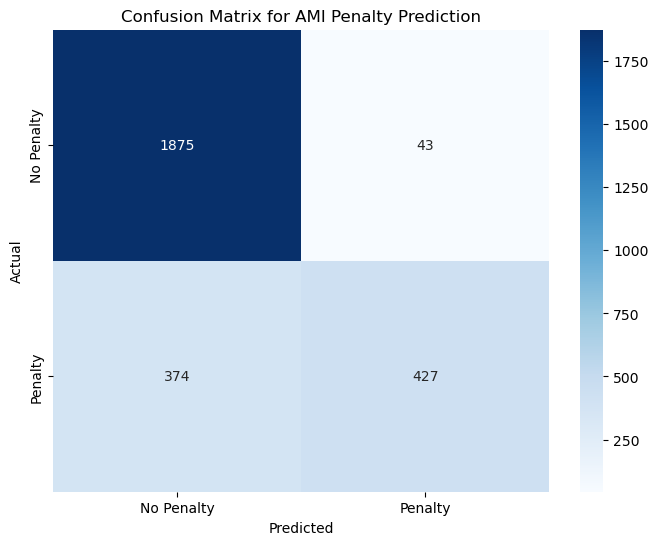

In [12]:
print("\n--- Building AMI Penalty Prediction Model ---")

df_ami = df.copy()
df_ami.dropna(subset=['Penalty indicator for AMI'], inplace=True)

# Target variable 'Penalty indicator for AMI' to binary
df_ami['Penalty indicator for AMI'] = df_ami['Penalty indicator for AMI'].apply(lambda x: 1 if x == 'Y' else 0)


features_ami = ['Payment adjustment factor', 'Payment reduction percentage', 'Dual proportion',
                'Peer group assignment', 'Neutrality modifier', 'ERR for AMI']
target_ami = 'Penalty indicator for AMI'

# Handle missing values and convert data types for AMI features
for col in features_ami:
    df_ami[col] = pd.to_numeric(df_ami[col], errors='coerce')
    df_ami[col].fillna(df_ami[col].mean(), inplace=True)


X_ami = df_ami[features_ami]
y_ami = df_ami[target_ami]


# Split data into training and testing sets (70% train, 30% test)
X_train_ami, X_test_ami, y_train_ami, y_test_ami = train_test_split(X_ami, y_ami, test_size=0.3, random_state=42, stratify=y_ami)

model_ami = LogisticRegression(random_state=42)
model_ami.fit(X_train_ami, y_train_ami)

# Make predictions on the test set
y_pred_ami = model_ami.predict(X_test_ami)

print("\nAccuracy for AMI model:", f"{accuracy_score(y_test_ami, y_pred_ami):.2f}")
print("\nClassification Report for AMI model:")
print(classification_report(y_test_ami, y_pred_ami, target_names=['No Penalty', 'Penalty']))

conf_matrix_ami = confusion_matrix(y_test_ami, y_pred_ami)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ami, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Penalty', 'Penalty'], yticklabels=['No Penalty', 'Penalty'])
plt.title('Confusion Matrix for AMI Penalty Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.savefig('..\\..\\views\\ami_penalty_confusion_matrix.png')
print("\nAMI model evaluation complete. Confusion matrix saved to 'ami_penalty_confusion_matrix.png'")
print("--- End of AMI Model ---\n")


--- Building COPD Penalty Prediction Model ---

Accuracy for COPD model: 0.84

Classification Report for COPD model:
              precision    recall  f1-score   support

  No Penalty       0.81      0.96      0.88      1653
     Penalty       0.91      0.66      0.76      1066

    accuracy                           0.84      2719
   macro avg       0.86      0.81      0.82      2719
weighted avg       0.85      0.84      0.83      2719


COPD model evaluation complete. Confusion matrix saved to 'copd_penalty_confusion_matrix.png'
--- End of COPD Model ---


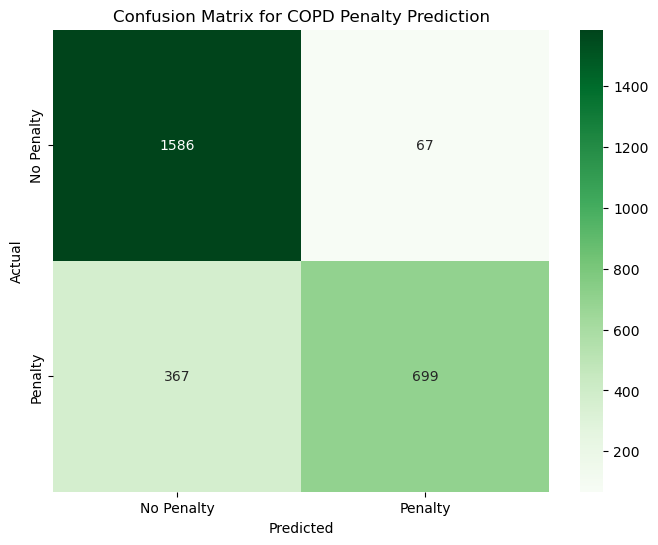

In [13]:
print("\n--- Building COPD Penalty Prediction Model ---")


df_copd = df.copy()

df_copd.dropna(subset=['Penalty indicator for COPD'], inplace=True)

# Convert target variable to binary
df_copd['Penalty indicator for COPD'] = df_copd['Penalty indicator for COPD'].apply(lambda x: 1 if x == 'Y' else 0)


features_copd = ['Payment adjustment factor', 'Payment reduction percentage', 'Dual proportion',
                 'Peer group assignment', 'Neutrality modifier', 'ERR for COPD']
target_copd = 'Penalty indicator for COPD'

# Handle missing values
for col in features_copd:
    df_copd[col] = pd.to_numeric(df_copd[col], errors='coerce')
    df_copd[col].fillna(df_copd[col].mean(), inplace=True)

# Define feature matrix and target vector
X_copd = df_copd[features_copd]
y_copd = df_copd[target_copd]


X_train_copd, X_test_copd, y_train_copd, y_test_copd = train_test_split(X_copd, y_copd, test_size=0.3, random_state=42, stratify=y_copd)

model_copd = LogisticRegression(random_state=42)
model_copd.fit(X_train_copd, y_train_copd)
y_pred_copd = model_copd.predict(X_test_copd)


print(f"\nAccuracy for COPD model: {accuracy_score(y_test_copd, y_pred_copd):.2f}")
print("\nClassification Report for COPD model:")
print(classification_report(y_test_copd, y_pred_copd, target_names=['No Penalty', 'Penalty']))

# Generate and save the confusion matrix for the COPD model
conf_matrix_copd = confusion_matrix(y_test_copd, y_pred_copd)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_copd, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Penalty', 'Penalty'], yticklabels=['No Penalty', 'Penalty'])
plt.title('Confusion Matrix for COPD Penalty Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.savefig('..\\..\\views\\copd_penalty_confusion_matrix.png')
print("\nCOPD model evaluation complete. Confusion matrix saved to 'copd_penalty_confusion_matrix.png'")
print("--- End of COPD Model ---")